In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()

In [3]:
X_train , X_test ,y_train ,y_test = train_test_split(cancer.data,cancer.target, random_state =1)

In [4]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

In [7]:
scaler.fit(X_train)

MinMaxScaler()

In [8]:
X_train_scaled = scaler.transform(X_train)

In [9]:
X_train_scaled

array([[0.389938  , 0.70713561, 0.4119273 , ..., 0.80962199, 0.59957224,
        0.91755006],
       [0.37763264, 0.31755157, 0.36790823, ..., 0.51168385, 0.33174905,
        0.31598672],
       [0.36438071, 0.35238417, 0.35208348, ..., 0.55292096, 0.3476711 ,
        0.28857479],
       ...,
       [0.48364807, 0.50084545, 0.48655933, ..., 0.65257732, 0.4151616 ,
        0.84259557],
       [0.3336173 , 0.3902604 , 0.31787713, ..., 0.27364261, 0.15684411,
        0.22443516],
       [0.28628899, 0.29455529, 0.26826066, ..., 0.17226804, 0.10004753,
        0.06938644]])

In [10]:
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))


per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### Without using preprocessing

In [12]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))
print('Train Set accuracy: {:.2f}'.format(svm.score(X_train,y_train)))

Test set accuracy: 0.94
Train Set accuracy: 0.94


### with preprocessing

In [13]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))
print("Scaled train set accuracy: {:.2f}".format(svm.score(X_train_scaled, y_train)))

Scaled test set accuracy: 0.97
Scaled train set accuracy: 1.00


In [14]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))
print("SVM train accuracy: {:.2f}".format(svm.score(X_train_scaled, y_train)))

SVM test accuracy: 0.96
SVM train accuracy: 1.00


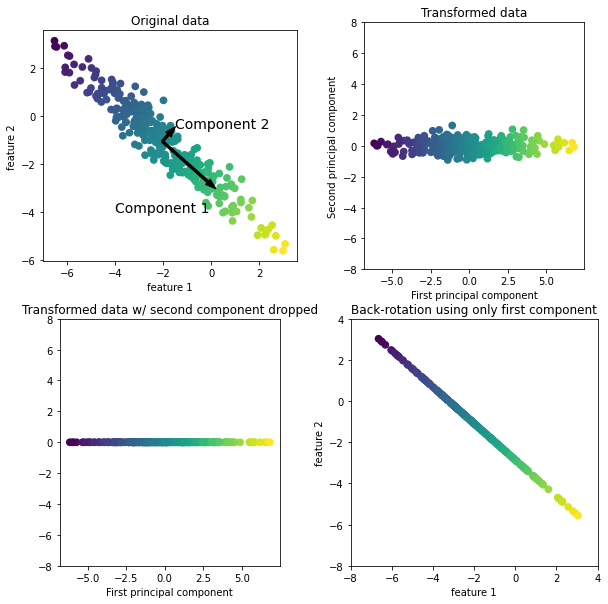

In [15]:
import mglearn

mglearn.plots.plot_pca_illustration()


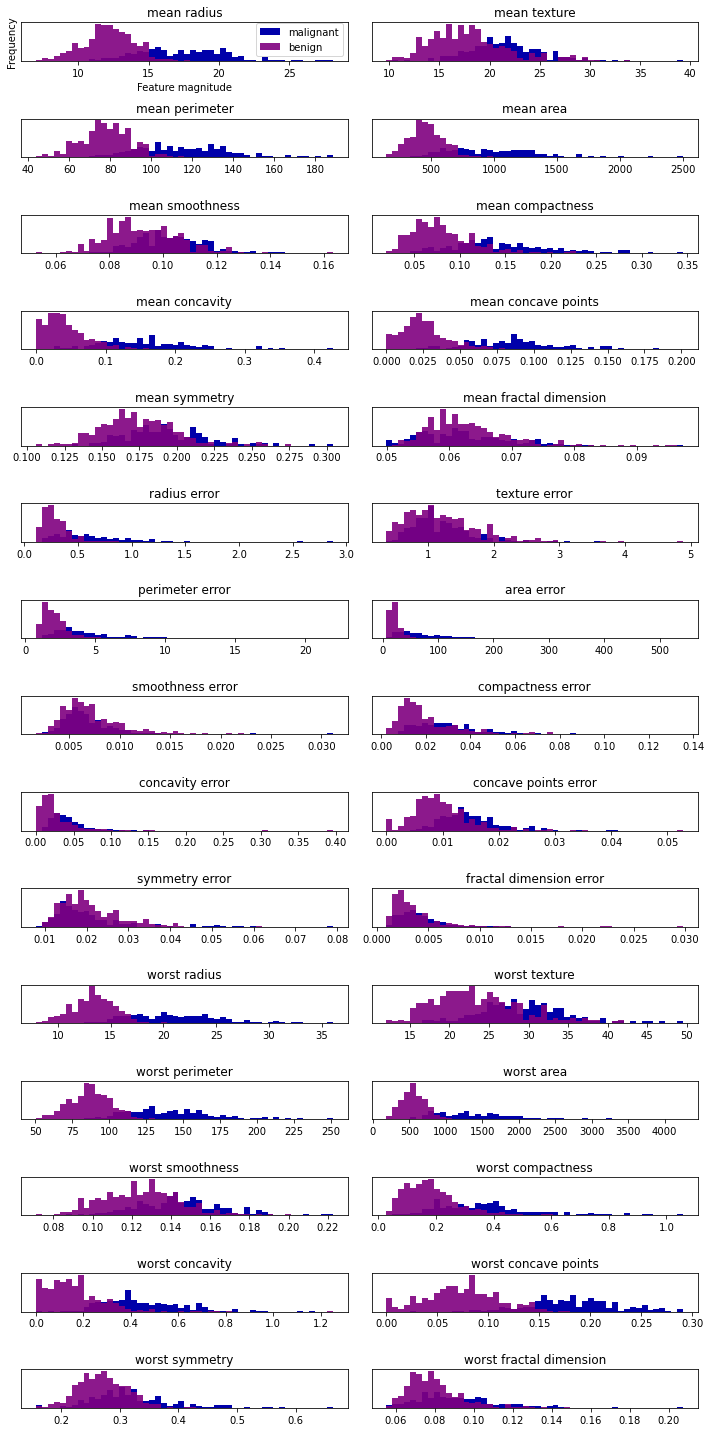

In [16]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=1)
    ax[i].hist(benign[:, i], bins=bins, color= 'purple', alpha= 0.9)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()


### Applying PCA on Datasets

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [18]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

PCA(n_components=2)

In [19]:
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


### Plotting the data after doing some PCA

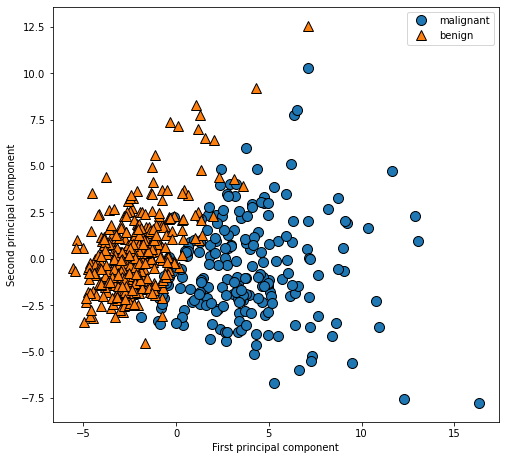

In [20]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

In [21]:
print('PCA component shape:{}'.format(pca.components_.shape))


PCA component shape:(2, 30)


In [22]:

print("PCA components:\n{}".format(pca.components_))


PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

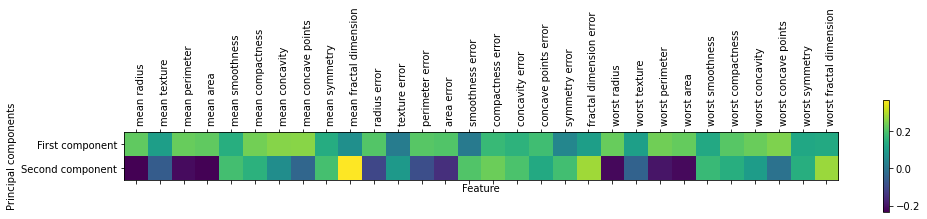

In [23]:
plt.matshow(pca.components_,cmap='viridis' )
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Image recognisation using PCA 

In [24]:
#from sklearn.datasets import fetch_lfw_people
#people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
#image_shape = people.images[0].shape
#fix, axes = plt.subplots(2, 5, figsize=(15, 8),
#subplot_kw={'xticks': (), 'yticks': ()})
#for target, image, ax in zip(people.target, people.images, axes.ravel()):
    #ax.imshow(image)
    #ax.set_title(people.target_names[target])


## K-Means

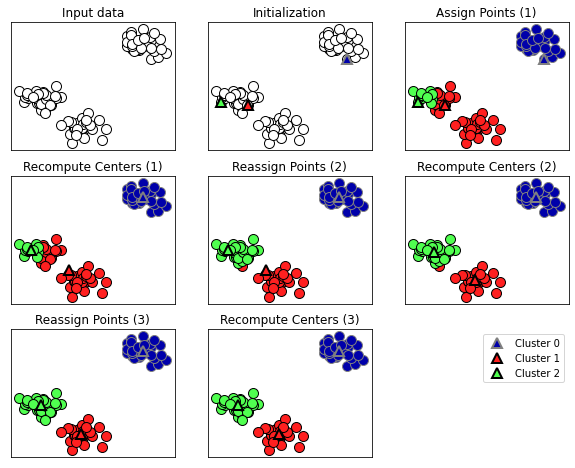

In [25]:
mglearn.plots.plot_kmeans_algorithm()


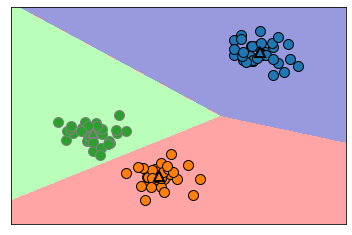

In [26]:
mglearn.plots.plot_kmeans_boundaries()

## NOw we do some fun with cluster

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [36]:
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=0)


In [37]:
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(n_clusters=3)

In [38]:
print("Cluster memberships:\n{}".format(kmeans.labels_))


Cluster memberships:
[2 0 2 1 1 0 1 1 2 0 0 0 2 0 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 1 0 2 2 0 1 0 0
 2 2 1 1 2 2 0 0 0 2 2 1 1 0 2 0 2 1 1 2 2 0 2 2 1 1 1 1 2 0 1 2 0 1 2 1 2
 0 0 0 0 1 2 0 0 2 0 0 0 0 0 2 0 2 2 1 1 1 1 0 0 1 1]


In [35]:
kmeans.labels_.sum()

99

In [39]:
print(kmeans.predict(X))


[2 0 2 1 1 0 1 1 2 0 0 0 2 0 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 1 0 2 2 0 1 0 0
 2 2 1 1 2 2 0 0 0 2 2 1 1 0 2 0 2 1 1 2 2 0 2 2 1 1 1 1 2 0 1 2 0 1 2 1 2
 0 0 0 0 1 2 0 0 2 0 0 0 0 0 2 0 2 2 1 1 1 1 0 0 1 1]


In [41]:
kmeans.predict(X).sum()

100

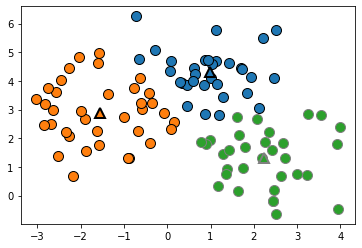

In [45]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2);

In [52]:
X[0:,].shape

(100, 2)

In [53]:
X[:,1].shape

(100,)

In [54]:
X.shape

(100, 2)

array([2, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0,
       0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2,
       0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1])

## DBSCAB Density based spatical clustring of application with noise

In [56]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


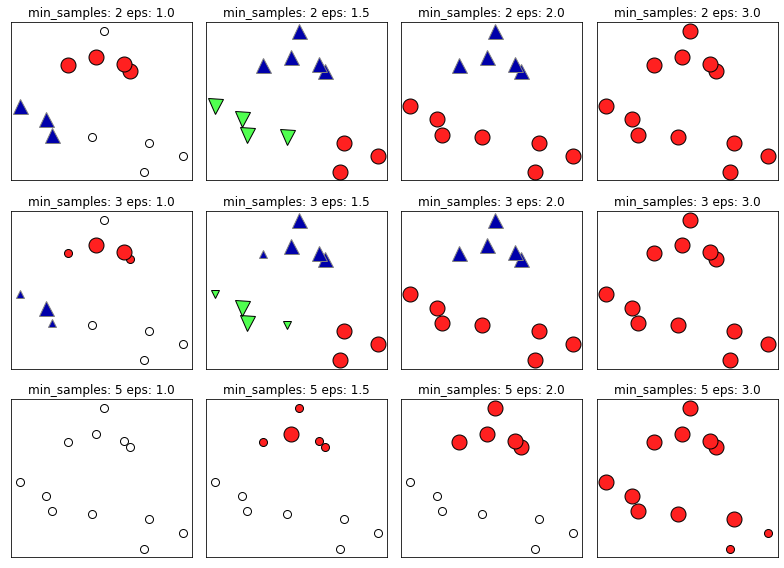

In [57]:

mglearn.plots.plot_dbscan()